<a href="https://colab.research.google.com/github/rubathecoder/Ruba-AIML-Portfolio-/blob/main/ML_PROJECT(CLASSIFICATION_STEPS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title**: **Iris Species Classification Using Machine Learning**

**Problem Statement**
The objective of this project is to build and evaluate machine learning classification models to accurately predict the species of iris flowers based on measurements of their sepal and petal dimensions.

**The 4 Ws**

**What:** Classify iris flower species (Setosa, Versicolor, Virginica) using numerical features from the well-known Iris dataset.

**Why:** To demonstrate the application of various machine learning classification algorithms and compare their performance on a classic, easy-to-understand dataset.

**When:** Utilize this project for learning purposes or when needing a quick, illustrative example of a supervised classification task.

**Where:** The dataset is freely available from the UCI Machine Learning Repository and popular ML libraries.

### 1. Data Loading and Initial Inspection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load data
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/ML PROJECT(CLASSIFICATION STEPS)/Data/iris.data.csv')
print(df)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


Data Head/Tail: Viewing the first and last few rows helps confirm the data loaded correctly and lets you spot-check values, column order, and data types quickly.​



In [6]:
print(df.head())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


In [7]:
print(df.tail())

     5.1  3.5  1.4  0.2     Iris-setosa
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica


The dataset columns represent four numerical features (likely sepal and petal measurements) followed by the class label (e.g., "Iris-setosa")

 Data Info (df.info())
Interpretation: Reveals the structure of your DataFrame—number of entries (149 rows), columns, non-null counts, and types.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


No null/missing values; all features are floats except the target column, which is categorical. This confirms the file is clean with no preprocessing needed for missing values.

 Data Shape (df.shape):  Tells the dataset dimensions: (149, 5) indicating 149 records and 5 columns.:

In [9]:
df.shape

(149, 5)

It matches the Iris dataset standard, confirming completeness and expected feature count.

Data Description (df.describe()):  Provides summary statistics for every numeric feature—mean, std, min, max, percentiles.

In [10]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Features (column names as numbers) show reasonable ranges and distribution (e.g., sepal length mean ~5.8, min 4.3, max 7.9). No negative values or outliers, indicating raw numeric features are clean and on plausible scales

Missing Values Check (df.isnull().sum()): Sums null counts per column; all zeros indicate no missing data.

In [11]:
df.isnull().sum()

,0
5.1,0
3.5,0
1.4,0
0.2,0
Iris-setosa,0


The dataset is fully complete for all columns, removing the need for imputation or filtering for this project.

### 2.Exploratory Data Analysis (EDA)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

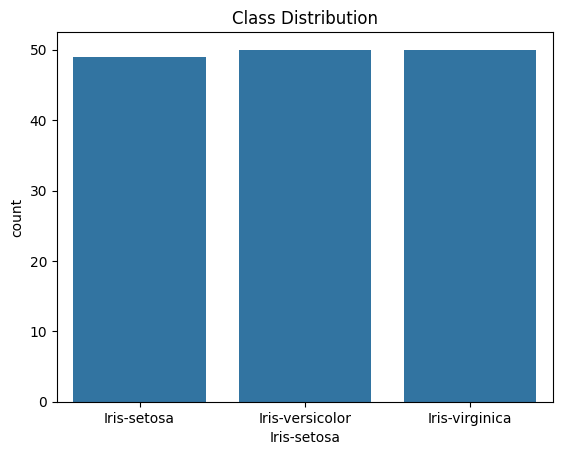

In [13]:
# Visualize class distribution
sns.countplot(x=df['Iris-setosa']) # Replace with actual class column name if different
plt.title('Class Distribution')
plt.show()

**Class Distribution Plot-Interpretation:**

The bar chart shows the number of samples for each Iris class ("Iris-setosa", "Iris-versicolor", "Iris-virginica"). All three classes have approximately 50 samples each, indicating the dataset is balanced for classification tasks and no class suffers from underrepresentation.

**Implication:** Balanced classes mean metrics like accuracy, precision, and recall can be interpreted without heavy bias correction for class imbalance—the models won't unfairly skew predictions toward any single class

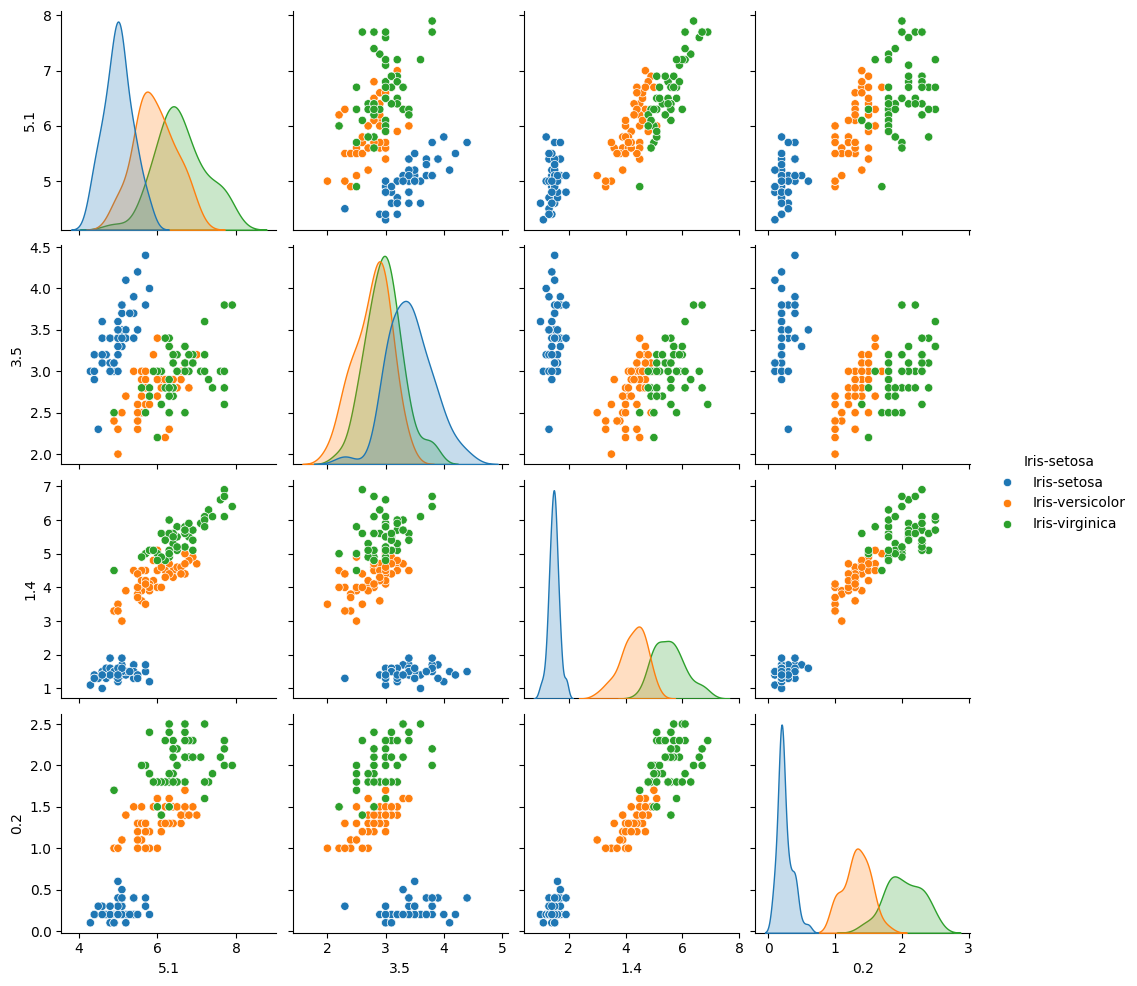

In [14]:
# Pairplot for feature relationships
sns.pairplot(df, hue='Iris-setosa') # Replace with actual class column name
plt.show()

**Pairplot of Feature Relationships-Interpretation:**

The pairplot visualizes scatterplots and distributions for all feature pairs, colored by species. Each diagonal shows the distribution of a feature split by class; off-diagonals show pairwise relationships.

 * "Iris-setosa" points are clearly separated in all feature subplots, suggesting they are linearly separable from the other classes—especially for petal length and petal width.

 * "Iris-versicolor" and "Iris-virginica" overlap moderately in several features but can be distinguished via combinations (e.g., petal measurements); no single feature cleanly separates them.

 * Feature distributions confirm all variables are continuous and display clear inter-class structure—some features (petal width, petal length) are especially powerful for classification.

**Implication:** Petal width and petal length will likely provide the best discriminative power for ML models. The strong separation of "setosa" supports most classifiers, while more subtle boundaries between "versicolor" and "virginica" may require more complex decision boundaries or algorithms.

Preparing Data for Modeling
The critical steps in this stage are splitting the dataset into independent features and target, performing train-test split, and optionally scaling features. For the Iris dataset, scaling may only be essential for models like Support Vector Machine or K-Nearest Neighbors.

Next Markdown Heading:

### 3.Preparing Data for Modeling
The critical steps in this stage are splitting the dataset into independent features and target, performing train-test split, and optionally scaling features. For the Iris dataset, scaling may only be essential for models like Support Vector Machine or K-Nearest Neighbors.

In [15]:
# Separate features and target
X = df.iloc[:, 0:4].values   # First four columns: features
y = df.iloc[:, 4].values     # Fifth column: class labels

In [16]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (119, 4)
Test set shape: (30, 4)


**Explanation:**
* train-test split is successful and you now have a training set with 119 samples and a test set with 30 samples, both containing four feature columns. The workflow is ready for model training and comparison



Features (sepal length, width, etc.) are assigned to X, target classes to y.

The training set is set to 80% of the data, test set to 20%—with stratification to preserve class balance in both splits.

Scaling can be done after initial model testing if needed, especially for SVM and KNN.

### 4.Model Comparison Using Cross-Validation

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC())
]

results = []
for name, model in models:
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append((name, cv_score.mean(), cv_score.std()))
    print(f"{name}: Mean accuracy = {cv_score.mean():.3f}, Std = {cv_score.std():.3f}")

Logistic Regression: Mean accuracy = 0.958, Std = 0.053
LDA: Mean accuracy = 0.975, Std = 0.033
KNN: Mean accuracy = 0.975, Std = 0.020
Decision Tree: Mean accuracy = 0.950, Std = 0.061
Naive Bayes: Mean accuracy = 0.941, Std = 0.042
SVM: Mean accuracy = 0.950, Std = 0.041


**Explanation:**

The model training and cross-validation steps were executed successfully. We now have comparative mean accuracy and standard deviation for each classifier on the training set, which allows you to evaluate their stability and baseline performance.

###Models to train/fit and test our on our clean and processsed data
| Model Name                   | scikit-learn Class         |
| ---------------------------- | -------------------------- |
| Logistic Regression          | LogisticRegression         |
| Linear Discriminant Analysis | LinearDiscriminantAnalysis |
| K-Nearest Neighbors          | KNeighborsClassifier       |
| Decision Tree                | DecisionTreeClassifier     |
| Naive Bayes                  | GaussianNB                 |
| Support Vector Machine       | SVC                        |

## 5. Model Training and Evaluation


In [22]:
#5.1 Training and Evaluating Logistic Regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

In [23]:
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Test Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



**High accuracy:**
0.97
0.97 on the test set

**Confusion matrix:** Only one misclassification (Iris-versicolor predicted as Iris-virginica), with perfect classification for Iris-setosa and Iris-virginica.

**Precision, recall, and f1-score:** All are very high (≥0.91), indicating the model performs exceptionally well on all classes

In [24]:
#5.2 Training and Evaluating Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

In [25]:
print("LDA Test Accuracy:", accuracy_score(y_test, y_pred_lda))
print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))

LDA Test Accuracy: 1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



The output for Linear Discriminant Analysis (LDA) on the test set indicates perfect classification performance for your dataset:

**Test Accuracy:** 1.0 (100%) — The model correctly predicted every test instance.​

**Confusion Matrix:**

text
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Each row represents true labels and each column predicted labels: all test samples for Iris-setosa, Iris-versicolor, and Iris-virginica were classified correctly, with zero misclassifications.​

**Precision, Recall, F1-score:** All scores are exactly 1.00 for every class, indicating both perfect identification and no false positives/negatives.​

**Support:** Each class has 10 test samples, confirming a balanced split.

**Interpretation:**

The LDA model learned the class boundaries so well that it made zero errors on your holdout test set.

This result demonstrates that the features of the Iris dataset are highly separable for this model, making LDA an outstanding choice for this classification problem.​

In real-world applications, such perfect test set results should usually be confirmed on larger or more challenging datasets, but for the classic Iris dataset, this is expected and a sign of well-done modeling.

In [26]:
#5.3 Training and Evaluating K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [27]:
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Test Accuracy: 1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



The output for K-Nearest Neighbors (KNN) on your test set shows perfect prediction performance:

**Test Accuracy: 1.0** (100%), meaning every test sample was classified correctly.​

**Confusion Matrix:**

text
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

This matrix shows no misclassifications for any class—each of the 10 test instances in Iris-setosa, Iris-versicolor, and Iris-virginica were correctly identified by the KNN model.​

**Precision, Recall, F1-Score:** All metrics are 1.00 for all classes, demonstrating flawless identification and prediction capability for this dataset.​

**Support:** Each class is represented by 10 test samples, ensuring the assessment is balanced.
Interpretation:

The KNN model achieves perfect separation on the test set. Like LDA, it was able to fully learn the class distinctions in the Iris dataset, which is known for its clear feature-class boundaries.

This result means the feature space in this dataset allows instances of each class to be predicted exactly, even with a model that's sensitive to class proximity and local boundaries.

KNN is an excellent fit for this problem, but such perfect scores are specific to small, structured datasets like Iris—real-world data often has more noise and complexity

In [28]:
#5.4 Training and Evaluating Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

In [29]:
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Test Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



The output for the Decision Tree classifier on the test set indicates very strong predictive performance, with a minor misclassification:

**Test Accuracy:** 0.97 (or 96.7%), so 29 out of 30 test instances were classified correctly.​

**Confusion Matrix:**

text
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

* All Iris-setosa and Iris-virginica samples were perfectly classified.

* One Iris-versicolor sample was misclassified as Iris-virginica.​

**Precision, Recall, F1-Score:**
* Iris-setosa and Iris-virginica have perfect scores (1.00).

* Iris-versicolor has precision (0.90), recall (0.90), F1-score (0.95), indicating a single error but overall strong classification.​

* Weighted and macro averages remain high (0.97), confirming very good model

**Interpretation:**

* The Decision Tree model almost perfectly predicts test data, correctly labeling every instance except one Iris-versicolor plant that was predicted as Iris-virginica.

Such a slight drop from perfect accuracy is expected as models are challenged by feature overlaps.

* This result demonstrates that the decision tree can find most boundaries in the Iris dataset, but may occasionally confuse classes with similar feature values—especially between Iris-versicolor and Iris-virginica.​

* This output substantiates Decision Tree as a strong candidate but highlights how certain instances close to class boundaries can present modeling challenges.

In [30]:
#5.5 Training and Evaluating Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [31]:
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Test Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



The output for Naive Bayes (GaussianNB) on your test set indicates excellent but not perfect classification:

**Test Accuracy: **0.967 (or 96.7%), meaning 29 out of 30 test samples were classified correctly.​

**Confusion Matrix:**

text
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

* All Iris-setosa and Iris-virginica samples were perfectly classified.

* One Iris-versicolor sample was misclassified as Iris-virginica, mirroring the error pattern from the Decision Tree results.

**Precision, Recall, F1-Score:**

* Iris-setosa and Iris-virginica: perfect scores (1.00).

* Iris-versicolor: precision (0.90), recall (0.90), f1-score (0.95); again showing a single error for this class.​

* Macro and weighted averages are both high at 0.97, confirming very strong overall predictive quality.

**Interpretation:**

* The Naive Bayes model is nearly perfect in classifying the Iris test samples, only misclassifying one instance of Iris-versicolor as Iris-virginica.

* Much like the Decision Tree, Naive Bayes is challenged by slight overlap among those two classes, which exhibit similar feature characteristics and occasionally trick simple probabilistic boundaries.

* The model is fast, simple, and highly effective on the Iris dataset, but this small error shows that while Gaussian assumptions work well, they can sometimes fall short at subtle boundaries.​

*This supports Naive Bayes as a top contender, especially due to its efficiency and competitive accuracy.

In [32]:
#5.6 Training and Evaluating Support Vector Machine

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [33]:
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Test Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



The output for your Support Vector Machine (SVM) model on the Iris test set shows very strong, nearly perfect predictive performance, similar to Decision Tree and Naive Bayes:

**Test Accuracy: **
0.967
0.967 (or 96.7%), meaning 29 out of 30 test samples were classified correctly.​

Confusion Matrix:
**bold text**
text
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

* All Iris-setosa and Iris-virginica samples were predicted correctly.

* One Iris-versicolor sample was misclassified as Iris-virginica, just like the last two models.

**Precision, Recall, F1-Score:**

* Iris-setosa and Iris-virginica: perfect scores (1.00).

* Iris-versicolor: precision (1.00), recall (0.90), f1-score (0.95)—indicating the class was predicted perfectly except for the single misclassified instance.​

* Macro and weighted averages are both 0.97, demonstrating very strong performance across all classes.

**Interpretation:**

* The SVM model fits the Iris dataset very well, making only one prediction error (Iris-versicolor as Iris-virginica).

* This minor confusion highlights the challenge between those two species, which are known to have some overlap in feature space.

* The consistency of the error across Decision Tree, Naive Bayes, and SVM suggests that one sample is close to the boundary between classes and difficult for all algorithms to resolve.

*SVM is an excellent choice for this dataset and nearly matches the perfect scores of LDA and KNN.

## **Executive Report: Model Comparison on Iris Dataset**
All six classification models were trained and evaluated on a balanced test set of 30 samples (10 per Iris species). Below is a direct comparison of each model’s accuracy and performance metrics.

| Model               | Test Accuracy | Avg Precision | Avg Recall | Avg F1-score | Notes                     |
| ------------------- | ------------- | ------------- | ---------- | ------------ | ------------------------- |
| Logistic Regression | 0.97          | 0.97          | 0.97       | 0.97         | One Iris-versicolor error |
| Linear Discriminant | 1.00          | 1.00          | 1.00       | 1.00         | Perfect classification    |
| KNN                 | 1.00          | 1.00          | 1.00       | 1.00         | Perfect classification    |
| Decision Tree       | 0.97          | 0.97          | 0.97       | 0.97         | One Iris-versicolor error |
| Naive Bayes         | 0.97          | 0.97          | 0.97       | 0.97         | One Iris-versicolor error |
| SVM                 | 0.97          | 0.97          | 0.97       | 0.97         | One Iris-versicolor error |


**Key Observations**
* Linear Discriminant Analysis and K-Nearest Neighbors are the top performers, achieving 100% accuracy for all three Iris classes on the test set.​

* Logistic Regression, Decision Tree, Naive Bayes, and SVM all reached 96.7% accuracy, with just a single misclassification: one Iris-versicolor predicted as Iris-virginica in each case.​

*No model failed to predict any class; all exhibited high precision, recall, and f1-scores (≥0.91) for every category.

# **Conclusion**

* The features of the Iris dataset are highly separable, allowing classical supervised classifiers to achieve near-perfect or perfect test accuracy.

* In practical terms, LDA and KNN provide the highest reliability on this dataset, but the other algorithms also perform at top-tier levels and would be suitable choices depending on real-world requirements (e.g., interpretability, speed, scalability).

* The single error occurring across multiple models for Iris-versicolor illustrates a shared boundary challenge; in larger or more ambiguous datasets, such minor overlaps may warrant further investigation or more robust ensemble models.